In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy import signal
from scipy.signal import spectrogram
from mne.preprocessing import ICA

In [ ]:
def process(edf_file_path, output_image_path):

    # Read file EDF using MNE
    raw = mne.io.read_raw_edf(edf_file_path, preload=True)

    #Applying ICA to reduce noise and pick channels with most information
    ica = ICA(n_components=15, max_iter="auto", random_state=0)
    ica.fit(raw)

    # Get the ICA sources
    ica_sources = ica.get_sources(raw)

    # Get the ICA source data as a NumPy array
    ica_source_data = ica_sources.get_data()

    #Limit amplitude from -0.3 to 0.3 to reduce all the leftover noises
    ica_source_data = np.clip(ica_source_data, -0.3, 0.3)

    #Avaraging the signal
    sum_signal = np.sum(ica_source_data, axis=0)   
    avg_signal = sum_signal / ica_source_data.shape[0]

    #Creates a new MNE object
    info = mne.create_info(['avg_signal'], raw.info['sfreq'], ch_types='eeg')
    avg_raw = mne.io.RawArray(avg_signal[np.newaxis, :], info)

    #Apply filter
    avg_raw.filter(l_freq=1, h_freq=2, method='iir')
    avg_raw.notch_filter(freqs=[1], method='iir')

    #Extract time points and data
    time_points = avg_raw.times
    dataplot = avg_raw.get_data()

    #PLotting
    plt.plot(time_points, dataplot[0], color='#90EE90')
    plt.savefig(output_image_path)
    plt.clf()

Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...
Fitting ICA to data using 33 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.8s.
Creating RawArray with float64 data, n_channels=1, n_times=303500


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (5e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


    Range : 0 ... 303499 =      0.000 ...  1213.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaanr_s001_t001.edf and saved image to 241116/epilepsy\aaaaaanr_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaanr_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 312999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 133.3s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (4.6e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=313000
    Range : 0 ... 312999 =      0.000 ...  1251.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaanr_s002_t001.edf and saved image to 241116/epilepsy\aaaaaanr_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaanr_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.1s.
Creating RawArray with float64 data, n_channels=1, n_times=331250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.3) and smallest (4e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaanr_s003_t000.edf and saved image to 241116/epilepsy\aaaaaanr_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaanr_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 317749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.8s.
Creating RawArray with float64 data, n_channels=1, n_times=317750
    Range : 0 ... 317749 =      0.000 ...  1270.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaanr_s004_t000.edf and saved image to 241116/epilepsy\aaaaaanr_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaawu_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 3.4s.
Creating RawArray with float64 data, n_channels=1, n_times=332250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (7.8e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


    Range : 0 ... 332249 =      0.000 ...  1328.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaawu_s001_t001.edf and saved image to 241116/epilepsy\aaaaaawu_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaawu_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 368499  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.5s.
Creating RawArray with float64 data, n_channels=1, n_times=368500


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (1.2e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


    Range : 0 ... 368499 =      0.000 ...  1473.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaawu_s002_t000.edf and saved image to 241116/epilepsy\aaaaaawu_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaawu_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.6s.
Creating RawArray with float64 data, n_channels=1, n_times=301250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (7.1e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaawu_s003_t000.edf and saved image to 241116/epilepsy\aaaaaawu_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaawu_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (34) and smallest (2.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=360750
    Range : 0 ... 360749 =      0.000 ...  1442.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaawu_s004_t000.edf and saved image to 241116/epilepsy\aaaaaawu_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabdn_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.2s.
Creating RawArray with float64 data, n_channels=1, n_times=376500
    Range : 0 ... 376499 =      0.000 ...  1505.996 secs


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (2.2e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabdn_s001_t000.edf and saved image to 241116/epilepsy\aaaaabdn_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabdn_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331999  =      0.000 ...  1327.996 secs...
Fitting ICA to data using 36 ch

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.7s.
Creating RawArray with float64 data, n_channels=1, n_times=332000
    Range : 0 ... 331999 =      0.000 ...  1327.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabdn_s002_t001.edf and saved image to 241116/epilepsy\aaaaabdn_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabhz_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (2.4e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=298500
    Range : 0 ... 298499 =      0.000 ...  1193.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabhz_s001_t001.edf and saved image to 241116/epilepsy\aaaaabhz_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabhz_s007_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.8s.
Creating RawArray with float64 data, n_channels=1, n_times=308250
    Range : 0 ... 308249 =      0.000 ...  1232.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabhz_s007_t001.edf and saved image to 241116/epilepsy\aaaaabhz_s007_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabhz_s015_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300500


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (4.8e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabhz_s015_t001.edf and saved image to 241116/epilepsy\aaaaabhz_s015_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabhz_s017_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 305999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.3s.
Creating RawArray with float64 data, n_channels=1, n_times=306000
    Range : 0 ... 305999 =      0.000 ...  1223.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabhz_s017_t000.edf and saved image to 241116/epilepsy\aaaaabhz_s017_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabhz_s018_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.4s.
Creating RawArray with float64 data, n_channels=1, n_times=308500


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (25) and smallest (3.6e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 308499 =      0.000 ...  1233.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabhz_s018_t000.edf and saved image to 241116/epilepsy\aaaaabhz_s018_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabju_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 324999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.8s.
Creating RawArray with float64 data, n_channels=1, n_times=325000
    Range : 0 ... 324999 =      0.000 ...  1299.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabju_s002_t000.edf and saved image to 241116/epilepsy\aaaaabju_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaabju_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.0s.
Creating RawArray with float64 data, n_channels=1, n_times=326000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (24) and smallest (2.1e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 325999 =      0.000 ...  1303.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaabju_s003_t001.edf and saved image to 241116/epilepsy\aaaaabju_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaacrz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 306999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 3.3s.
Creating RawArray with float64 data, n_channels=1, n_times=307000
    Range : 0 ... 306999 =      0.000 ...  1227.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (1e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaacrz_s001_t001.edf and saved image to 241116/epilepsy\aaaaacrz_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaacrz_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300999  =      0.000 ...  1203.996 secs...
Fitting ICA to data using 30 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 3.9s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaacrz_s002_t000.edf and saved image to 241116/epilepsy\aaaaacrz_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaadkv_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.2s.
Creating RawArray with float64 data, n_channels=1, n_times=320500
    Range : 0 ... 320499 =      0.000 ...  1281.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (4.2e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaadkv_s001_t001.edf and saved image to 241116/epilepsy\aaaaadkv_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaadkv_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 320749  =      0.000 ...  1282.996 secs...
Fitting ICA to data using 41 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 161.4s.
Creating RawArray with float64 data, n_channels=1, n_times=320750
    Range : 0 ... 320749 =      0.000 ...  1282.996 secs
Ready.
Filtering raw data in 1 contiguous segment


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (5.4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaadkv_s002_t000.edf and saved image to 241116/epilepsy\aaaaadkv_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaadkv_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 340499  =      0.000 ...  1361.996 secs...
Fitting ICA to data using 31 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.1s.
Creating RawArray with float64 data, n_channels=1, n_times=340500
    Range : 0 ... 340499 =      0.000 ...  1361.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (26) and smallest (6.7e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaadkv_s003_t000.edf and saved image to 241116/epilepsy\aaaaadkv_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaelp_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300749  =      0.000 ...  1202.996 secs...
Fitting ICA to data using 36 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (2.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaelp_s002_t000.edf and saved image to 241116/epilepsy\aaaaaelp_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaelp_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300499  =      0.000 ...  1201.996 secs...
Fitting ICA to data using 41 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.9s.
Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaelp_s003_t000.edf and saved image to 241116/epilepsy\aaaaaelp_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaelp_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaelp_s005_t000.edf and saved image to 241116/epilepsy\aaaaaelp_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaelp_s006_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.
Creating RawArray with float64 data, n_channels=1, n_times=303000
    Range : 0 ... 302999 =      0.000 ...  1211.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (31) and smallest (2.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaelp_s006_t000.edf and saved image to 241116/epilepsy\aaaaaelp_s006_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaelp_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 302249  =      0.000 ...  1208.996 secs...
Fitting ICA to data using 30 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 125.2s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (5.8e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=302250
    Range : 0 ... 302249 =      0.000 ...  1208.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaelp_s007_t000.edf and saved image to 241116/epilepsy\aaaaaelp_s007_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaeph_s004_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (5e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=310750
    Range : 0 ... 310749 =      0.000 ...  1242.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaeph_s004_t000.edf and saved image to 241116/epilepsy\aaaaaeph_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaeph_s005_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.3s.
Creating RawArray with float64 data, n_channels=1, n_times=303000
    Range : 0 ... 302999 =      0.000 ...  1211.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaeph_s005_t000.edf and saved image to 241116/epilepsy\aaaaaeph_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaeqq_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.1s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz



C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (7.9e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaeqq_s003_t001.edf and saved image to 241116/epilepsy\aaaaaeqq_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaeqq_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300999  =      0.000 ...  1203.996 secs...
Fitting ICA to data using 30 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 3.9s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.3) and smallest (5.6e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaeqq_s004_t000.edf and saved image to 241116/epilepsy\aaaaaeqq_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaewf_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 328249  =      0.000 ...  1312.996 secs...
Fitting ICA to data using 41 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 40.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (1.1e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=328250
    Range : 0 ... 328249 =      0.000 ...  1312.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaewf_s001_t001.edf and saved image to 241116/epilepsy\aaaaaewf_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaewf_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.
Creating RawArray with float64 data, n_channels=1, n_times=364250
    Range : 0 ... 364249 =      0.000 ...  1456.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaewf_s002_t000.edf and saved image to 241116/epilepsy\aaaaaewf_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaafif_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (2.8e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=338500
    Range : 0 ... 338499 =      0.000 ...  1353.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaafif_s001_t001.edf and saved image to 241116/epilepsy\aaaaafif_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaafif_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (9.1e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=355000
    Range : 0 ... 354999 =      0.000 ...  1419.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaafif_s003_t000.edf and saved image to 241116/epilepsy\aaaaafif_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaafif_s004_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.
Creating RawArray with float64 data, n_channels=1, n_times=324250
    Range : 0 ... 324249 =      0.000 ...  1296.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaafif_s004_t000.edf and saved image to 241116/epilepsy\aaaaafif_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaflb_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.5s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (22) and smallest (5.1e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=300250
    Range : 0 ... 300249 =      0.000 ...  1200.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaflb_s001_t000.edf and saved image to 241116/epilepsy\aaaaaflb_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaflb_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (9.4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=360000
    Range : 0 ... 359999 =      0.000 ...  1439.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaflb_s002_t000.edf and saved image to 241116/epilepsy\aaaaaflb_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaflb_s004_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.5s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (17) and smallest (3.2e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=297500
    Range : 0 ... 297499 =      0.000 ...  1189.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaflb_s004_t001.edf and saved image to 241116/epilepsy\aaaaaflb_s004_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaflb_s005_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (13) and smallest (9.9e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=375500
    Range : 0 ... 375499 =      0.000 ...  1501.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaflb_s005_t000.edf and saved image to 241116/epilepsy\aaaaaflb_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagnh_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (1.7e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagnh_s001_t000.edf and saved image to 241116/epilepsy\aaaaagnh_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagxr_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=305000
    Range : 0 ... 304999 =      0.000 ...  1219.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagxr_s001_t001.edf and saved image to 241116/epilepsy\aaaaagxr_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagxr_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagxr_s002_t000.edf and saved image to 241116/epilepsy\aaaaagxr_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagxr_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.4s.
Creating RawArray with float64 data, n_channels=1, n_times=305000
    Range : 0 ... 304999 =      0.000 ...  1219.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagxr_s005_t001.edf and saved image to 241116/epilepsy\aaaaagxr_s005_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagxr_s006_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.9s.
Creating RawArray with float64 data, n_channels=1, n_times=303750
    Range : 0 ... 303749 =      0.000 ...  1214.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagxr_s006_t000.edf and saved image to 241116/epilepsy\aaaaagxr_s006_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaagxr_s008_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (12) and smallest (9.2e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=343500
    Range : 0 ... 343499 =      0.000 ...  1373.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaagxr_s008_t000.edf and saved image to 241116/epilepsy\aaaaagxr_s008_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaicb_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.6s.
Creating RawArray with float64 data, n_channels=1, n_times=360500
    Range : 0 ... 360499 =      0.000 ...  1441.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaicb_s001_t000.edf and saved image to 241116/epilepsy\aaaaaicb_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaicb_s002_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.2s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaicb_s002_t000.edf and saved image to 241116/epilepsy\aaaaaicb_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiek_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 11.8s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (9.3e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=328750
    Range : 0 ... 328749 =      0.000 ...  1314.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiek_s001_t000.edf and saved image to 241116/epilepsy\aaaaaiek_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiek_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 15.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (2.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=319750
    Range : 0 ... 319749 =      0.000 ...  1278.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiek_s002_t000.edf and saved image to 241116/epilepsy\aaaaaiek_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiek_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (1.2e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Fitting ICA took 152.1s.
Creating RawArray with float64 data, n_channels=1, n_times=301500
    Range : 0 ... 301499 =      0.000 ...  1205.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiek_s003_t000.edf and saved image to 241116/epilepsy\aaaaaiek_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaifn_s002_t001.edf...
EDF file detected
Setti

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.6s.
Creating RawArray with float64 data, n_channels=1, n_times=297500
    Range : 0 ... 297499 =      0.000 ...  1189.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaifn_s002_t001.edf and saved image to 241116/epilepsy\aaaaaifn_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaifp_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.
Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaifp_s001_t000.edf and saved image to 241116/epilepsy\aaaaaifp_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaifp_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.3s.
Creating RawArray with float64 data, n_channels=1, n_times=306750


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (34) and smallest (5.1e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 306749 =      0.000 ...  1226.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaifp_s002_t000.edf and saved image to 241116/epilepsy\aaaaaifp_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaifp_s005_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (3e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=331750
    Range : 0 ... 331749 =      0.000 ...  1326.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaifp_s005_t000.edf and saved image to 241116/epilepsy\aaaaaifp_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiiz_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.
Creating RawArray with float64 data, n_channels=1, n_times=305000
    Range : 0 ... 304999 =      0.000 ...  1219.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiiz_s001_t000.edf and saved image to 241116/epilepsy\aaaaaiiz_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaimz_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.1s.
Creating RawArray with float64 data, n_channels=1, n_times=303000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (1.7e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


    Range : 0 ... 302999 =      0.000 ...  1211.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaimz_s001_t000.edf and saved image to 241116/epilepsy\aaaaaimz_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaimz_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 346249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.8s.
Creating RawArray with float64 data, n_channels=1, n_times=346250
    Range : 0 ... 346249 =      0.000 ...  1384.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaimz_s003_t000.edf and saved image to 241116/epilepsy\aaaaaimz_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaimz_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.4s.
Creating RawArray with float64 data, n_channels=1, n_times=326750
    Range : 0 ... 326749 =      0.000 ...  1306.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaimz_s004_t001.edf and saved image to 241116/epilepsy\aaaaaimz_s004_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaint_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.9s.
Creating RawArray with float64 data, n_channels=1, n_times=303250
    Range : 0 ... 303249 =      0.000 ...  1212.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaint_s001_t000.edf and saved image to 241116/epilepsy\aaaaaint_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaint_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 15.2s.
Creating RawArray with float64 data, n_channels=1, n_times=301500
    Range : 0 ... 301499 =      0.000 ...  1205.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaint_s002_t000.edf and saved image to 241116/epilepsy\aaaaaint_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaint_s005_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=307250
    Range : 0 ... 307249 =      0.000 ...  1228.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaint_s005_t000.edf and saved image to 241116/epilepsy\aaaaaint_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaint_s006_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.9s.
Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaint_s006_t000.edf and saved image to 241116/epilepsy\aaaaaint_s006_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiud_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.9s.
Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiud_s001_t001.edf and saved image to 241116/epilepsy\aaaaaiud_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaiud_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.7s.
Creating RawArray with float64 data, n_channels=1, n_times=303250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (9.4e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 303249 =      0.000 ...  1212.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaiud_s003_t000.edf and saved image to 241116/epilepsy\aaaaaiud_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300499  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 156.9s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s001_t000.edf and saved image to 241116/epilepsy\aaaaajat_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s003_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.1s.
Creating RawArray with float64 data, n_channels=1, n_times=313500
    Range : 0 ... 313499 =      0.000 ...  1253.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s003_t001.edf and saved image to 241116/epilepsy\aaaaajat_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s004_t000.edf and saved image to 241116/epilepsy\aaaaajat_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 17.4s.
Creating RawArray with float64 data, n_channels=1, n_times=310000
    Range : 0 ... 309999 =      0.000 ...  1239.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s005_t001.edf and saved image to 241116/epilepsy\aaaaajat_s005_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s007_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.4s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s007_t000.edf and saved image to 241116/epilepsy\aaaaajat_s007_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s008_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (4.4e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s008_t000.edf and saved image to 241116/epilepsy\aaaaajat_s008_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s017_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=319250
    Range : 0 ... 319249 =      0.000 ...  1276.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s017_t000.edf and saved image to 241116/epilepsy\aaaaajat_s017_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajat_s018_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (15) and smallest (1.8e-14) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=362250
    Range : 0 ... 362249 =      0.000 ...  1448.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajat_s018_t000.edf and saved image to 241116/epilepsy\aaaaajat_s018_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajbn_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (4.6e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=336250
    Range : 0 ... 336249 =      0.000 ...  1344.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajbn_s001_t001.edf and saved image to 241116/epilepsy\aaaaajbn_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajbn_s002_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.9s.
Creating RawArray with float64 data, n_channels=1, n_times=313250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (14) and smallest (3.5e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 313249 =      0.000 ...  1252.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajbn_s002_t001.edf and saved image to 241116/epilepsy\aaaaajbn_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajbn_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 319999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.8s.
Creating RawArray with float64 data, n_channels=1, n_times=320000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (23) and smallest (1.5e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 319999 =      0.000 ...  1279.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajbn_s003_t000.edf and saved image to 241116/epilepsy\aaaaajbn_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 315249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.6s.
Creating RawArray with float64 data, n_channels=1, n_times=315250
    Range : 0 ... 315249 =      0.000 ...  1260.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s001_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s019_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.8s.
Creating RawArray with float64 data, n_channels=1, n_times=302750
    Range : 0 ... 302749 =      0.000 ...  1210.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s019_t001.edf and saved image to 241116/epilepsy\aaaaajqo_s019_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s022_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.7s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s022_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s022_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s023_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.6s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s023_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s023_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s024_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 158.8s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Creating RawArray with float64 data, n_channels=1, n_times=311750
    Range : 0 ... 311749 =      0.000 ...  1246.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s024_t001.edf and saved image to 241116/epilepsy\aaaaajqo_s024_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s026_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.5s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (5e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=310000
    Range : 0 ... 309999 =      0.000 ...  1239.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s026_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s026_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s027_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.1s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s027_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s027_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s028_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (5.6e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=306500
    Range : 0 ... 306499 =      0.000 ...  1225.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s028_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s028_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajqo_s033_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 147.3s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.7) and smallest (1.1e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=305250
    Range : 0 ... 305249 =      0.000 ...  1220.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajqo_s033_t000.edf and saved image to 241116/epilepsy\aaaaajqo_s033_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajud_s004_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.0s.
Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajud_s004_t000.edf and saved image to 241116/epilepsy\aaaaajud_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajud_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.0s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajud_s005_t000.edf and saved image to 241116/epilepsy\aaaaajud_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajud_s006_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 149.6s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajud_s006_t001.edf and saved image to 241116/epilepsy\aaaaajud_s006_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajud_s007_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.8s.
Creating RawArray with float64 data, n_channels=1, n_times=300250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (4.1e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 300249 =      0.000 ...  1200.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajud_s007_t000.edf and saved image to 241116/epilepsy\aaaaajud_s007_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaajus_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 326999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.0s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (21) and smallest (6e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=327000
    Range : 0 ... 326999 =      0.000 ...  1307.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaajus_s003_t001.edf and saved image to 241116/epilepsy\aaaaajus_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakbt_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.4s.
Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakbt_s001_t001.edf and saved image to 241116/epilepsy\aaaaakbt_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakbt_s002_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (35) and smallest (4.4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=302750
    Range : 0 ... 302749 =      0.000 ...  1210.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakbt_s002_t000.edf and saved image to 241116/epilepsy\aaaaakbt_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakfe_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (7.1e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=304000
    Range : 0 ... 303999 =      0.000 ...  1215.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakfe_s001_t000.edf and saved image to 241116/epilepsy\aaaaakfe_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakfe_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.3s.
Creating RawArray with float64 data, n_channels=1, n_times=302000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (26) and smallest (2e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakfe_s003_t000.edf and saved image to 241116/epilepsy\aaaaakfe_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakgl_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.8s.
Creating RawArray with float64 data, n_channels=1, n_times=299250
    Range : 0 ... 299249 =      0.000 ...  1196.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakgl_s001_t001.edf and saved image to 241116/epilepsy\aaaaakgl_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakgl_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 19.0s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (1.8e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=346750
    Range : 0 ... 346749 =      0.000 ...  1386.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakgl_s002_t000.edf and saved image to 241116/epilepsy\aaaaakgl_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakgl_s003_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.0s.
Creating RawArray with float64 data, n_channels=1, n_times=333250
    Range : 0 ... 333249 =      0.000 ...  1332.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakgl_s003_t001.edf and saved image to 241116/epilepsy\aaaaakgl_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakgy_s001_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.1) and smallest (1.6e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=305250
    Range : 0 ... 305249 =      0.000 ...  1220.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakgy_s001_t001.edf and saved image to 241116/epilepsy\aaaaakgy_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaklt_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 156.2s.


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (5.3e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=311000
    Range : 0 ... 310999 =      0.000 ...  1243.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaklt_s001_t001.edf and saved image to 241116/epilepsy\aaaaaklt_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaklt_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.26) and smallest (7.3e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=322500
    Range : 0 ... 322499 =      0.000 ...  1289.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaklt_s002_t000.edf and saved image to 241116/epilepsy\aaaaaklt_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaklt_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.4s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (25) and smallest (5e-15) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=347500
    Range : 0 ... 347499 =      0.000 ...  1389.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaklt_s003_t000.edf and saved image to 241116/epilepsy\aaaaaklt_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaklv_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 12.8s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=299000
    Range : 0 ... 298999 =      0.000 ...  1195.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaklv_s001_t001.edf and saved image to 241116/epilepsy\aaaaaklv_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaklv_s003_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.0s.
Creating RawArray with float64 data, n_channels=1, n_times=299000
    Range : 0 ... 298999 =      0.000 ...  1195.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaklv_s003_t001.edf and saved image to 241116/epilepsy\aaaaaklv_s003_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakoq_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.
Creating RawArray with float64 data, n_channels=1, n_times=300000
    Range : 0 ... 299999 =      0.000 ...  1199.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakoq_s002_t001.edf and saved image to 241116/epilepsy\aaaaakoq_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakoq_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 12.0s.
Creating RawArray with float64 data, n_channels=1, n_times=346750
    Range : 0 ... 346749 =      0.000 ...  1386.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakoq_s004_t000.edf and saved image to 241116/epilepsy\aaaaakoq_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakoq_s010_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.7s.
Creating RawArray with float64 data, n_channels=1, n_times=324250
    Range : 0 ... 324249 =      0.000 ...  1296.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakoq_s010_t001.edf and saved image to 241116/epilepsy\aaaaakoq_s010_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqa_s001_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=300750


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (21) and smallest (3e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqa_s001_t000.edf and saved image to 241116/epilepsy\aaaaakqa_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqa_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (27) and smallest (6e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqa_s002_t000.edf and saved image to 241116/epilepsy\aaaaakqa_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqa_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.7s.
Creating RawArray with float64 data, n_channels=1, n_times=350000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.9) and smallest (3.1e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 349999 =      0.000 ...  1399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqa_s003_t000.edf and saved image to 241116/epilepsy\aaaaakqa_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqq_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 13.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (3.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=364250
    Range : 0 ... 364249 =      0.000 ...  1456.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqq_s001_t001.edf and saved image to 241116/epilepsy\aaaaakqq_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqq_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqq_s002_t000.edf and saved image to 241116/epilepsy\aaaaakqq_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqq_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.7s.
Creating RawArray with float64 data, n_channels=1, n_times=357750
    Range : 0 ... 357749 =      0.000 ...  1430.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqq_s003_t000.edf and saved image to 241116/epilepsy\aaaaakqq_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqq_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.
Creating RawArray with float64 data, n_channels=1, n_times=355000
    Range : 0 ... 354999 =      0.000 ...  1419.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqq_s004_t001.edf and saved image to 241116/epilepsy\aaaaakqq_s004_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakqq_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.6s.
Creating RawArray with float64 data, n_channels=1, n_times=322000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (28) and smallest (1.6e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 321999 =      0.000 ...  1287.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakqq_s005_t000.edf and saved image to 241116/epilepsy\aaaaakqq_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaktn_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 313249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.5s.
Creating RawArray with float64 data, n_channels=1, n_times=313250
    Range : 0 ... 313249 =      0.000 ...  1252.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaktn_s001_t001.edf and saved image to 241116/epilepsy\aaaaaktn_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaktn_s002_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.7s.
Creating RawArray with float64 data, n_channels=1, n_times=355750
    Range : 0 ... 355749 =      0.000 ...  1422.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaktn_s002_t000.edf and saved image to 241116/epilepsy\aaaaaktn_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakvr_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 11.8s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (18) and smallest (4e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=368000
    Range : 0 ... 367999 =      0.000 ...  1471.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakvr_s001_t000.edf and saved image to 241116/epilepsy\aaaaakvr_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaakyc_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 13.4s.
Creating RawArray with float64 data, n_channels=1, n_times=323000
    Range : 0 ... 322999 =      0.000 ...  1291.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaakyc_s001_t001.edf and saved image to 241116/epilepsy\aaaaakyc_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalfg_s007_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.5s.
Creating RawArray with float64 data, n_channels=1, n_times=330750
    Range : 0 ... 330749 =      0.000 ...  1322.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalfg_s007_t000.edf and saved image to 241116/epilepsy\aaaaalfg_s007_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalgi_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.4s.
Creating RawArray with float64 data, n_channels=1, n_times=365750
    Range : 0 ... 365749 =      0.000 ...  1462.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalgi_s001_t001.edf and saved image to 241116/epilepsy\aaaaalgi_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalhr_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=319750
    Range : 0 ... 319749 =      0.000 ...  1278.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalhr_s001_t000.edf and saved image to 241116/epilepsy\aaaaalhr_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalib_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.5s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (36) and smallest (3.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=310250
    Range : 0 ... 310249 =      0.000 ...  1240.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalib_s001_t000.edf and saved image to 241116/epilepsy\aaaaalib_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalib_s008_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.3s.
Creating RawArray with float64 data, n_channels=1, n_times=327250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (24) and smallest (2.8e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 327249 =      0.000 ...  1308.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalib_s008_t001.edf and saved image to 241116/epilepsy\aaaaalib_s008_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalib_s009_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 323249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.5s.
Creating RawArray with float64 data, n_channels=1, n_times=323250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.5) and smallest (1.2e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 323249 =      0.000 ...  1292.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalib_s009_t000.edf and saved image to 241116/epilepsy\aaaaalib_s009_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalim_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 345499  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=345500
    Range : 0 ... 345499 =      0.000 ...  1381.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalim_s001_t001.edf and saved image to 241116/epilepsy\aaaaalim_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalim_s011_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.9s.
Creating RawArray with float64 data, n_channels=1, n_times=302250
    Range : 0 ... 302249 =      0.000 ...  1208.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalim_s011_t000.edf and saved image to 241116/epilepsy\aaaaalim_s011_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalim_s012_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.9s.
Creating RawArray with float64 data, n_channels=1, n_times=298000
    Range : 0 ... 297999 =      0.000 ...  1191.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalim_s012_t001.edf and saved image to 241116/epilepsy\aaaaalim_s012_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaliw_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.9s.
Creating RawArray with float64 data, n_channels=1, n_times=312500
    Range : 0 ... 312499 =      0.000 ...  1249.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaliw_s001_t001.edf and saved image to 241116/epilepsy\aaaaaliw_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaliw_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300250
    Range : 0 ... 300249 =      0.000 ...  1200.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaliw_s002_t000.edf and saved image to 241116/epilepsy\aaaaaliw_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaliw_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (40) and smallest (6.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=302500
    Range : 0 ... 302499 =      0.000 ...  1209.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaliw_s003_t000.edf and saved image to 241116/epilepsy\aaaaaliw_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalof_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.6s.
Creating RawArray with float64 data, n_channels=1, n_times=301500
    Range : 0 ... 301499 =      0.000 ...  1205.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalof_s001_t000.edf and saved image to 241116/epilepsy\aaaaalof_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalon_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (39) and smallest (3.5e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=307500
    Range : 0 ... 307499 =      0.000 ...  1229.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalon_s002_t000.edf and saved image to 241116/epilepsy\aaaaalon_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalqm_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (22) and smallest (2.5e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=361250
    Range : 0 ... 361249 =      0.000 ...  1444.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalqm_s001_t000.edf and saved image to 241116/epilepsy\aaaaalqm_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalqm_s002_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.1s.
Creating RawArray with float64 data, n_channels=1, n_times=303000
    Range : 0 ... 302999 =      0.000 ...  1211.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (4e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)



IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalqm_s002_t000.edf and saved image to 241116/epilepsy\aaaaalqm_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalqm_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 341249  =      0.000 ...  1364.996 secs...
Fitting ICA to data using 36 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (19) and smallest (2.1e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=341250
    Range : 0 ... 341249 =      0.000 ...  1364.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalqm_s003_t002.edf and saved image to 241116/epilepsy\aaaaalqm_s003_t002.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalug_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.3s.
Creating RawArray with float64 data, n_channels=1, n_times=301000
    Range : 0 ... 300999 =      0.000 ...  1203.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalug_s001_t000.edf and saved image to 241116/epilepsy\aaaaalug_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalug_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.
Creating RawArray with float64 data, n_channels=1, n_times=345250
    Range : 0 ... 345249 =      0.000 ...  1380.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalug_s002_t001.edf and saved image to 241116/epilepsy\aaaaalug_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaluq_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.7s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (17) and smallest (1.3e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=304000
    Range : 0 ... 303999 =      0.000 ...  1215.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaluq_s002_t000.edf and saved image to 241116/epilepsy\aaaaaluq_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalzg_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 156.1s.
Creating RawArray with float64 data, n_channels=1, n_times=301250


d:\mne-python\1.7.1_0\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.9) and smallest (1.4e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalzg_s001_t000.edf and saved image to 241116/epilepsy\aaaaalzg_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalzg_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 346499  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.2s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (14) and smallest (3.2e-14) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=346500
    Range : 0 ... 346499 =      0.000 ...  1385.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalzg_s002_t000.edf and saved image to 241116/epilepsy\aaaaalzg_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalzg_s005_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.4s.
Creating RawArray with float64 data, n_channels=1, n_times=310250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (2.2e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 310249 =      0.000 ...  1240.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalzg_s005_t000.edf and saved image to 241116/epilepsy\aaaaalzg_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalzg_s009_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.7s.
Creating RawArray with float64 data, n_channels=1, n_times=308000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (15) and smallest (1.7e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 307999 =      0.000 ...  1231.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalzg_s009_t000.edf and saved image to 241116/epilepsy\aaaaalzg_s009_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaalzg_s018_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 337749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 12.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (19) and smallest (1e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=337750
    Range : 0 ... 337749 =      0.000 ...  1350.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaalzg_s018_t000.edf and saved image to 241116/epilepsy\aaaaalzg_s018_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamde_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (4.8e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=317500
    Range : 0 ... 317499 =      0.000 ...  1269.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamde_s001_t001.edf and saved image to 241116/epilepsy\aaaaamde_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamde_s002_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.8s.
Creating RawArray with float64 data, n_channels=1, n_times=344250
    Range : 0 ... 344249 =      0.000 ...  1376.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamde_s002_t001.edf and saved image to 241116/epilepsy\aaaaamde_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamde_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.3s.
Creating RawArray with float64 data, n_channels=1, n_times=363750
    Range : 0 ... 363749 =      0.000 ...  1454.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamde_s003_t000.edf and saved image to 241116/epilepsy\aaaaamde_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamde_s004_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.6s.
Creating RawArray with float64 data, n_channels=1, n_times=377000
    Range : 0 ... 376999 =      0.000 ...  1507.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamde_s004_t000.edf and saved image to 241116/epilepsy\aaaaamde_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamgc_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.7s.
Creating RawArray with float64 data, n_channels=1, n_times=300250
    Range : 0 ... 300249 =      0.000 ...  1200.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamgc_s001_t001.edf and saved image to 241116/epilepsy\aaaaamgc_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamgc_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.0s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (17) and smallest (1.1e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=364000
    Range : 0 ... 363999 =      0.000 ...  1455.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamgc_s002_t000.edf and saved image to 241116/epilepsy\aaaaamgc_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamhb_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.
Creating RawArray with float64 data, n_channels=1, n_times=320250
    Range : 0 ... 320249 =      0.000 ...  1280.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamhb_s003_t000.edf and saved image to 241116/epilepsy\aaaaamhb_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamhb_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.7s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamhb_s005_t000.edf and saved image to 241116/epilepsy\aaaaamhb_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamic_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.3s.
Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamic_s002_t000.edf and saved image to 241116/epilepsy\aaaaamic_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamkx_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (3.6e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=362750
    Range : 0 ... 362749 =      0.000 ...  1450.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamkx_s001_t000.edf and saved image to 241116/epilepsy\aaaaamkx_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamlf_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.7s.
Creating RawArray with float64 data, n_channels=1, n_times=305000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (14) and smallest (5.2e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 304999 =      0.000 ...  1219.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamlf_s001_t001.edf and saved image to 241116/epilepsy\aaaaamlf_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamlm_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 311749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.0s.
Creating RawArray with float64 data, n_channels=1, n_times=311750
    Range : 0 ... 311749 =      0.000 ...  1246.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamlm_s001_t000.edf and saved image to 241116/epilepsy\aaaaamlm_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamnj_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (24) and smallest (1.4e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=362250
    Range : 0 ... 362249 =      0.000 ...  1448.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamnj_s001_t000.edf and saved image to 241116/epilepsy\aaaaamnj_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamoa_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.8s.
Creating RawArray with float64 data, n_channels=1, n_times=315500
    Range : 0 ... 315499 =      0.000 ...  1261.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamoa_s001_t000.edf and saved image to 241116/epilepsy\aaaaamoa_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamoa_s008_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=360750
    Range : 0 ... 360749 =      0.000 ...  1442.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamoa_s008_t000.edf and saved image to 241116/epilepsy\aaaaamoa_s008_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamor_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.4s.
Creating RawArray with float64 data, n_channels=1, n_times=301750


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (4.1e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 301749 =      0.000 ...  1206.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamor_s001_t000.edf and saved image to 241116/epilepsy\aaaaamor_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamrq_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.7s.
Creating RawArray with float64 data, n_channels=1, n_times=303750
    Range : 0 ... 303749 =      0.000 ...  1214.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamrq_s001_t000.edf and saved image to 241116/epilepsy\aaaaamrq_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamsw_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.0s.
Creating RawArray with float64 data, n_channels=1, n_times=298250
    Range : 0 ... 298249 =      0.000 ...  1192.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamsw_s001_t001.edf and saved image to 241116/epilepsy\aaaaamsw_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamsw_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.3s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (6.8e-14) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=360500
    Range : 0 ... 360499 =      0.000 ...  1441.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamsw_s002_t000.edf and saved image to 241116/epilepsy\aaaaamsw_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamsw_s003_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.1s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (5.7e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=366250
    Range : 0 ... 366249 =      0.000 ...  1464.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamsw_s003_t000.edf and saved image to 241116/epilepsy\aaaaamsw_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamtl_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.5s.
Creating RawArray with float64 data, n_channels=1, n_times=304250
    Range : 0 ... 304249 =      0.000 ...  1216.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamtl_s001_t000.edf and saved image to 241116/epilepsy\aaaaamtl_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamtl_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 11.9s.
Creating RawArray with float64 data, n_channels=1, n_times=354000
    Range : 0 ... 353999 =      0.000 ...  1415.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamtl_s002_t000.edf and saved image to 241116/epilepsy\aaaaamtl_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s001_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.4s.
Creating RawArray with float64 data, n_channels=1, n_times=314750
    Range : 0 ... 314749 =      0.000 ...  1258.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s001_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.3s.
Creating RawArray with float64 data, n_channels=1, n_times=303000
    Range : 0 ... 302999 =      0.000 ...  1211.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s002_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.1s.
Creating RawArray with float64 data, n_channels=1, n_times=302000
    Range : 0 ... 301999 =      0.000 ...  1207.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s003_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.3s.
Creating RawArray with float64 data, n_channels=1, n_times=300500
    Range : 0 ... 300499 =      0.000 ...  1201.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s004_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s008_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.7s.
Creating RawArray with float64 data, n_channels=1, n_times=306000
    Range : 0 ... 305999 =      0.000 ...  1223.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s008_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s008_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaamuy_s011_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.5s.
Creating RawArray with float64 data, n_channels=1, n_times=304750
    Range : 0 ... 304749 =      0.000 ...  1218.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaamuy_s011_t000.edf and saved image to 241116/epilepsy\aaaaamuy_s011_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanag_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.8s.
Creating RawArray with float64 data, n_channels=1, n_times=303500
    Range : 0 ... 303499 =      0.000 ...  1213.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanag_s001_t001.edf and saved image to 241116/epilepsy\aaaaanag_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanag_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.6s.
Creating RawArray with float64 data, n_channels=1, n_times=311500
    Range : 0 ... 311499 =      0.000 ...  1245.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanag_s002_t000.edf and saved image to 241116/epilepsy\aaaaanag_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaandx_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.1s.
Creating RawArray with float64 data, n_channels=1, n_times=333250
    Range : 0 ... 333249 =      0.000 ...  1332.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaandx_s001_t001.edf and saved image to 241116/epilepsy\aaaaandx_s001_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanfk_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=311000
    Range : 0 ... 310999 =      0.000 ...  1243.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanfk_s001_t000.edf and saved image to 241116/epilepsy\aaaaanfk_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanfk_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.4s.
Creating RawArray with float64 data, n_channels=1, n_times=346000


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (27) and smallest (1.4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 345999 =      0.000 ...  1383.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanfk_s002_t000.edf and saved image to 241116/epilepsy\aaaaanfk_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanfl_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 318999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 13.3s.
Creating RawArray with float64 data, n_channels=1, n_times=319000
    Range : 0 ... 318999 =      0.000 ...  1275.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanfl_s001_t000.edf and saved image to 241116/epilepsy\aaaaanfl_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanhr_s001_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 12.8s.
Creating RawArray with float64 data, n_channels=1, n_times=318750


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.7) and smallest (7.8e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 318749 =      0.000 ...  1274.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanhr_s001_t000.edf and saved image to 241116/epilepsy\aaaaanhr_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanjh_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 343249  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.7s.
Creating RawArray with float64 data, n_channels=1, n_times=343250


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (29) and smallest (1.6e-09) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 343249 =      0.000 ...  1372.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanjh_s003_t000.edf and saved image to 241116/epilepsy\aaaaanjh_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaankz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaankz_s001_t000.edf and saved image to 241116/epilepsy\aaaaankz_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaankz_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.0s.
Creating RawArray with float64 data, n_channels=1, n_times=305000
    Range : 0 ... 304999 =      0.000 ...  1219.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaankz_s002_t000.edf and saved image to 241116/epilepsy\aaaaankz_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaankz_s004_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300250
    Range : 0 ... 300249 =      0.000 ...  1200.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaankz_s004_t000.edf and saved image to 241116/epilepsy\aaaaankz_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaankz_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.4s.
Creating RawArray with float64 data, n_channels=1, n_times=304250
    Range : 0 ... 304249 =      0.000 ...  1216.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaankz_s005_t000.edf and saved image to 241116/epilepsy\aaaaankz_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanmf_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.0s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.49) and smallest (1.5e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=356250
    Range : 0 ... 356249 =      0.000 ...  1424.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanmf_s001_t000.edf and saved image to 241116/epilepsy\aaaaanmf_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaannz_s008_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.8s.
Creating RawArray with float64 data, n_channels=1, n_times=354500
    Range : 0 ... 354499 =      0.000 ...  1417.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaannz_s008_t001.edf and saved image to 241116/epilepsy\aaaaannz_s008_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanog_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=358000
    Range : 0 ... 357999 =      0.000 ...  1431.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanog_s001_t000.edf and saved image to 241116/epilepsy\aaaaanog_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanog_s002_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 4.4s.
Creating RawArray with float64 data, n_channels=1, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanog_s002_t000.edf and saved image to 241116/epilepsy\aaaaanog_s002_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanog_s005_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.5s.
Creating RawArray with float64 data, n_channels=1, n_times=301250
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanog_s005_t000.edf and saved image to 241116/epilepsy\aaaaanog_s005_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanog_s006_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.2s.
Creating RawArray with float64 data, n_channels=1, n_times=348250
    Range : 0 ... 348249 =      0.000 ...  1392.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanog_s006_t000.edf and saved image to 241116/epilepsy\aaaaanog_s006_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanog_s010_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.0s.
Creating RawArray with float64 data, n_channels=1, n_times=331500
    Range : 0 ... 331499 =      0.000 ...  1325.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanog_s010_t000.edf and saved image to 241116/epilepsy\aaaaanog_s010_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaanzp_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.53) and smallest (3.2e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=318750
    Range : 0 ... 318749 =      0.000 ...  1274.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaanzp_s001_t000.edf and saved image to 241116/epilepsy\aaaaanzp_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaock_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.9s.
Creating RawArray with float64 data, n_channels=1, n_times=331000
    Range : 0 ... 330999 =      0.000 ...  1323.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaock_s001_t000.edf and saved image to 241116/epilepsy\aaaaaock_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaocl_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.3s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (13) and smallest (3e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=330750
    Range : 0 ... 330749 =      0.000 ...  1322.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaocl_s001_t000.edf and saved image to 241116/epilepsy\aaaaaocl_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaogc_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 7.4s.
Creating RawArray with float64 data, n_channels=1, n_times=336250
    Range : 0 ... 336249 =      0.000 ...  1344.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaogc_s001_t000.edf and saved image to 241116/epilepsy\aaaaaogc_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaogc_s003_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.1s.
Creating RawArray with float64 data, n_channels=1, n_times=320250
    Range : 0 ... 320249 =      0.000 ...  1280.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaogc_s003_t000.edf and saved image to 241116/epilepsy\aaaaaogc_s003_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaoou_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (17) and smallest (1.4e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=331250
    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaoou_s001_t000.edf and saved image to 241116/epilepsy\aaaaaoou_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaotl_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 11.3s.
Creating RawArray with float64 data, n_channels=1, n_times=375500
    Range : 0 ... 375499 =      0.000 ...  1501.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaotl_s001_t000.edf and saved image to 241116/epilepsy\aaaaaotl_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaoui_s002_t

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.8s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (12) and smallest (3.3e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=344500
    Range : 0 ... 344499 =      0.000 ...  1377.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaoui_s002_t001.edf and saved image to 241116/epilepsy\aaaaaoui_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaowq_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.5s.
Creating RawArray with float64 data, n_channels=1, n_times=313250
    Range : 0 ... 313249 =      0.000 ...  1252.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaowq_s001_t000.edf and saved image to 241116/epilepsy\aaaaaowq_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaozy_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 10.4s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (22) and smallest (2.2e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=375750
    Range : 0 ... 375749 =      0.000 ...  1502.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaozy_s001_t000.edf and saved image to 241116/epilepsy\aaaaaozy_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapfa_s004_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.5s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (25) and smallest (1.1e-11) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=315250
    Range : 0 ... 315249 =      0.000 ...  1260.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapfa_s004_t000.edf and saved image to 241116/epilepsy\aaaaapfa_s004_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapge_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.9s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (29) and smallest (2.1e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=369000
    Range : 0 ... 368999 =      0.000 ...  1475.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapge_s001_t000.edf and saved image to 241116/epilepsy\aaaaapge_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaaphz_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 6.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.18) and smallest (1.8e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=316750
    Range : 0 ... 316749 =      0.000 ...  1266.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaaphz_s001_t000.edf and saved image to 241116/epilepsy\aaaaaphz_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapjn_s001_t000.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.8s.
Creating RawArray with float64 data, n_channels=1, n_times=342500


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (23) and smallest (2.1e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 342499 =      0.000 ...  1369.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapjn_s001_t000.edf and saved image to 241116/epilepsy\aaaaapjn_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapkm_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 326749  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 5.0s.
Creating RawArray with float64 data, n_channels=1, n_times=326750
    Range : 0 ... 326749 =      0.000 ...  1306.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapkm_s002_t001.edf and saved image to 241116/epilepsy\aaaaapkm_s002_t001.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapri_s001_t0

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 9.1s.
Creating RawArray with float64 data, n_channels=1, n_times=322750


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.5) and smallest (5.5e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


    Range : 0 ... 322749 =      0.000 ...  1290.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapri_s001_t000.edf and saved image to 241116/epilepsy\aaaaapri_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapvx_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 349999  =      0.

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 8.6s.


C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (26) and smallest (1.7e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)


Creating RawArray with float64 data, n_channels=1, n_times=350000
    Range : 0 ... 349999 =      0.000 ...  1399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapvx_s001_t000.edf and saved image to 241116/epilepsy\aaaaapvx_s001_t000.png
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy_250\aaaaapwd_s001_t001.edf...
EDF file detected
Setting channel info structure

C:\Users\PC\AppData\Local\Temp\ipykernel_22664\52954705.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 15 components
Fitting ICA took 16.7s.
Creating RawArray with float64 data, n_channels=1, n_times=314750
    Range : 0 ... 314749 =      0.000 ...  1258.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 2.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 1.5 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 1.50 Hz: -6.02, -6.02 dB

Processed epilepsy_250\aaaaapwd_s001_t001.edf and saved image to 241116/epilepsy\aaaaapwd_s001_t001.png


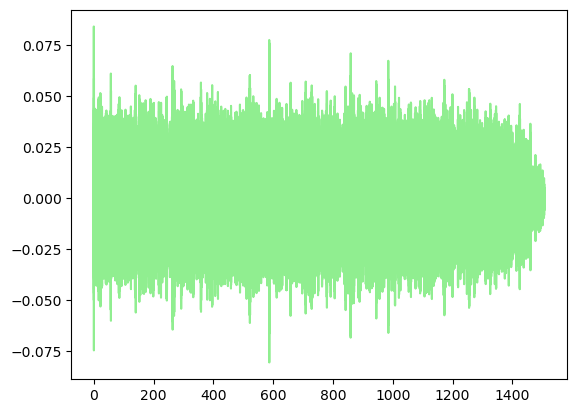

In [7]:
path = "epilepsy_250"
output_dir = "241116/epilepsy"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(path):
    if filename.endswith('.edf'):
        input_dir = os.path.join(path, filename)
        output_image_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.png")
        
        # Process the file and save the image
        process(input_dir, output_image_path)

        print(f"Processed {input_dir} and saved image to {output_image_path}")